# Statistics Tutorial - Lesson 2
# Quartiles and Percentiles

## Quartiles

[Quartiles](https://en.wikipedia.org/wiki/Quartile) divide the number of ordered data points into four parts. The three main quartiles are as follows: 
- The 1st quartile is the middle number between the smallest number and the median of the data set.
- The 2nd quartile is the median.
- The 3rd quartile is the middle value between the median and the highest value.

In [1]:
# Example 1
def get_median(sorted_list):
    """
    Calculate Median of given sorted list
    - the midpoint is meaningful when values are sorted
    """
    count = len(sorted_list)
    if count % 2 == 1:
        return sorted_list[count//2]
    else:
        return (sorted_list[count//2-1] + sorted_list[count//2]) / 2
    
def get_quartiles(sorted_list):
    """
    Calculate quartiles of given sorted list
    
    Return
    ------
    1st quartile, 2nd quartile, 3rd quartile
    """
    median_value = get_median(sorted_list)
    count = len(sorted_list)
    if count % 2 == 1:
        first_quartile = get_median(sorted_list[:count//2])
        third_quartile = get_median(sorted_list[count//2+1:])
        return first_quartile, median_value, third_quartile
    else:
        first_quartile = get_median(sorted_list[:count//2])
        third_quartile = get_median(sorted_list[count//2:])
        return first_quartile, median_value, third_quartile        
    
data_set_A = sorted([9, 11, 13, 14, 17, 21, 22])
q1_a, q2_a, q3_a = get_quartiles(data_set_A)
print('In data set A, 1st Quartile is {}, 2nd Quartile is {} and 3rd Quartile is {}'.format(q1_a, q2_a, q3_a))

data_set_B = sorted([19, 20, 23, 24, 30, 32])
q1_b, q2_b, q3_b = get_quartiles(data_set_B)
print('In data set B, 1st Quartile is {}, 2nd Quartile is {} and 3rd Quartile is {}'.format(q1_b, q2_b, q3_b))


In data set A, 1st Quartile is 11, 2nd Quartile is 14 and 3rd Quartile is 21
In data set B, 1st Quartile is 20, 2nd Quartile is 23.5 and 3rd Quartile is 30


In [2]:
# Example 2
# by built-in statistics library
from statistics import quantiles

q1_a, q2_a, q3_a = quantiles(data_set_A)
print('In data set A, 1st Quartile is {}, 2nd Quartile is {} and 3rd Quartile is {}'.format(q1_a, q2_a, q3_a))

q1_b, q2_b, q3_b = quantiles(data_set_B)
print('In data set B, 1st Quartile is {}, 2nd Quartile is {} and 3rd Quartile is {}'.format(q1_b, q2_b, q3_b))


In data set A, 1st Quartile is 11.0, 2nd Quartile is 14.0 and 3rd Quartile is 21.0
In data set B, 1st Quartile is 19.75, 2nd Quartile is 23.5 and 3rd Quartile is 30.5


For the above exanple, the built-in library interpolates between data points to find empirical quantiles, so the results are different from the example 1. See explanation at [Quartile's Computing Method](https://en.wikipedia.org/wiki/Quartile).

In [3]:
# Example 3
# by NumPy
import numpy as np

array_A = np.array(data_set_A)
q1_a = np.percentile(array_A, 25, method='inverted_cdf')
q2_a = np.percentile(array_A, 50, method='inverted_cdf')
q3_a = np.percentile(array_A, 75, method='inverted_cdf')
print('In data set A, 1st Quartile is {}, 2nd Quartile is {} and 3rd Quartile is {}'.format(q1_a, q2_a, q3_a))

array_B = np.array(data_set_B)
q1_b = np.percentile(array_B, 25, method='inverted_cdf')
q2_b = np.percentile(array_B, 50, method='inverted_cdf')
q3_b = np.percentile(array_B, 75, method='inverted_cdf')
print('In data set B, 1st Quartile is {}, 2nd Quartile is {} and 3rd Quartile is {}'.format(q1_b, q2_b, q3_b))


In data set A, 1st Quartile is 11, 2nd Quartile is 14 and 3rd Quartile is 21
In data set B, 1st Quartile is 20, 2nd Quartile is 23 and 3rd Quartile is 30


*CDF stands for [Cumulative Distribution Function](https://en.wikipedia.org/wiki/Cumulative_distribution_function)*

## Percentiles

[Percentiles](https://en.wikipedia.org/wiki/Percentile) are often used to divide ordered data points. They divide into 100 parts as named. 

In addition, Percentiles are closely related to Qartiles. The 25th percentile is also known as the first quartile, the 50th percentile as the median or second quartile, and the 75th percentile as the third quartile. 

In [4]:
# Example 1
import math

def get_percentile(sorted_list, percent):
    n = len(sorted_list)
    k = (n-1) * percent
    f = math.floor(k)
    c = math.ceil(k)
    if f == c:
        return sorted_list[int(k)]
    else:
        d0 = sorted_list[int(f)] * (c-k)
        d1 = sorted_list[int(c)] * (k-f)
        return d0 + d1

q1_a = get_percentile(data_set_A, 0.25)
q2_a = get_percentile(data_set_A, 0.50)
q3_a = get_percentile(data_set_A, 0.75)
print('In data set A, 25th Percentile is {}, 50th Percentile is {} and 75th Percentile is {}'.format(q1_a, q2_a, q3_a))

q1_b = get_percentile(data_set_B, 0.25)
q2_b = get_percentile(data_set_B, 0.50)
q3_b = get_percentile(data_set_B, 0.75)
print('In data set B, 25th Percentile is {}, 50th Percentile is {} and 75th Percentile is {}'.format(q1_b, q2_b, q3_b))


In data set A, 25th Percentile is 12.0, 50th Percentile is 14 and 75th Percentile is 19.0
In data set B, 25th Percentile is 20.75, 50th Percentile is 23.5 and 75th Percentile is 28.5


In [5]:
# Example 2
# by built-in statistics library
from statistics import quantiles

percentiles_A = quantiles(data_set_A, n=100)
print('In data set A, 25th Percentile is {}, 50th Percentile is {} and 75th Percentile is {}'.format(percentiles_A[25-1], percentiles_A[50-1], percentiles_A[75-1]))

percentiles_B = quantiles(data_set_B, n=100)
print('In data set B, 1st Quartile is {}, 2nd Quartile is {} and 3rd Quartile is {}'.format(percentiles_B[25-1], percentiles_B[50-1], percentiles_B[75-1]))


In data set A, 25th Percentile is 11.0, 50th Percentile is 14.0 and 75th Percentile is 21.0
In data set B, 1st Quartile is 19.75, 2nd Quartile is 23.5 and 3rd Quartile is 30.5


## Interquartile Range (IQR)

An important use of quartiles is to calculate [Interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) or IQR. IQR represents the difference between the 3rd and the 1st quartiles of a data set. This can be used as an indicator for variability of the dataset.

In [6]:
# Example 1
q1_a, _, q3_a = get_quartiles(data_set_A)
print('IQR of data set A is {}'.format(q3_a - q1_a))

q1_b, _, q3_b = get_quartiles(data_set_B)
print('IQR of data set B is {}'.format(q3_b - q1_b))

IQR of data set A is 10
IQR of data set B is 10


In [7]:
# Example 2
# by built-in statistics library

q1_a, _, q3_a = quantiles(data_set_A)
print('IQR of data set A is {}'.format(q3_a - q1_a))

q1_b, _, q3_b = quantiles(data_set_B)
print('IQR of data set B is {}'.format(q3_b - q1_b))

IQR of data set A is 10.0
IQR of data set B is 10.75


In [8]:
# Example 3
# by SciPy
from scipy.stats import iqr
print('IQR of data set A is {}'.format(iqr(array_A)))
print('IQR of data set B is {}'.format(iqr(array_B)))

IQR of data set A is 7.0
IQR of data set B is 7.75


## Boxplot

A [boxplot](https://en.wikipedia.org/wiki/Box_plot) is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles. It shows minimum, first quartile, median, third quartile and maximum.

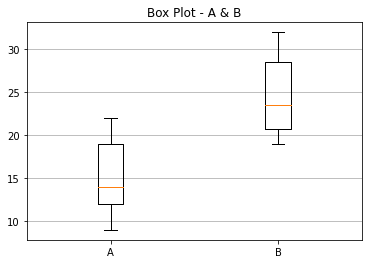

In [9]:
# Example for Data set A and B
import matplotlib.pyplot as plt
given_data = [data_set_A, data_set_B]
fig, ax = plt.subplots()
ax.set_title('Box Plot - A & B')
ax.boxplot(given_data, labels=['A', 'B'])
ax.yaxis.grid(True)
plt.show()